In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import rotate

from train_model import load_data, MnistClassifier

In [6]:
X_train, y_train, X_test, y_test = load_data()

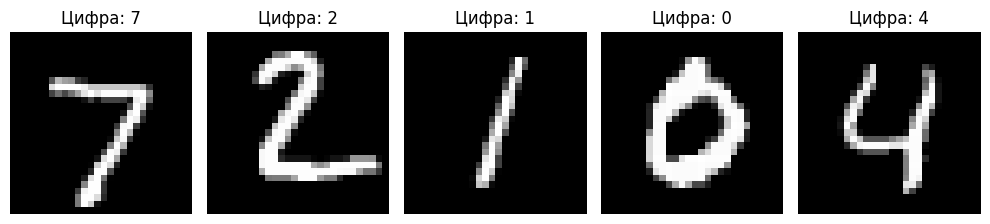

In [7]:
plt.figure(figsize=(10, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Цифра: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [8]:
print("Random Forest:")
rf_model = MnistClassifier('rf')
print("Training model...")
rf_model.classifier.train_model(X_train, y_train)
print("Testing model...")
rf_predictions = rf_model.classifier.predict_model(X_test) 
rf_accuracy = (rf_predictions == y_test).mean()
print(f"Accuracy Random Forest: {rf_accuracy:.4f}")

Random Forest:
Training model...
Testing model...
Accuracy Random Forest: 0.9690


In [9]:
print("Neural Network:")
nn_model = MnistClassifier('nn')
print("Training model...")
nn_model.classifier.train_model(X_train, y_train)  
print("Testing model...")
nn_predictions = nn_model.classifier.predict_model(X_test)
nn_accuracy = (nn_predictions == y_test).mean()
print(f"Accuracy Neural Network: {nn_accuracy:.4f}")

Neural Network:
Training model...
Epoch [1/5], Loss: 0.2878
Epoch [2/5], Loss: 0.1108
Epoch [3/5], Loss: 0.0748
Epoch [4/5], Loss: 0.0545
Epoch [5/5], Loss: 0.0412
Testing model...
Accuracy Neural Network: 0.9747


In [10]:
print("CNN:")
cnn_model = MnistClassifier('cnn')
print("Training model...")
cnn_model.classifier.train_model(X_train, y_train)  # Використовуємо лише 2 епохи для швидкості
print("Testing model...")
cnn_predictions = cnn_model.classifier.predict_model(X_test)
cnn_accuracy = (cnn_predictions == y_test).mean()
print(f"Accuracy CNN: {cnn_accuracy:.4f}")

CNN:
Training model...
Epoch [1/5], Loss: 1.5661
Epoch [2/5], Loss: 1.4886
Epoch [3/5], Loss: 1.4816
Epoch [4/5], Loss: 1.4778
Epoch [5/5], Loss: 1.4753
Testing model...
Accuracy CNN: 0.9830


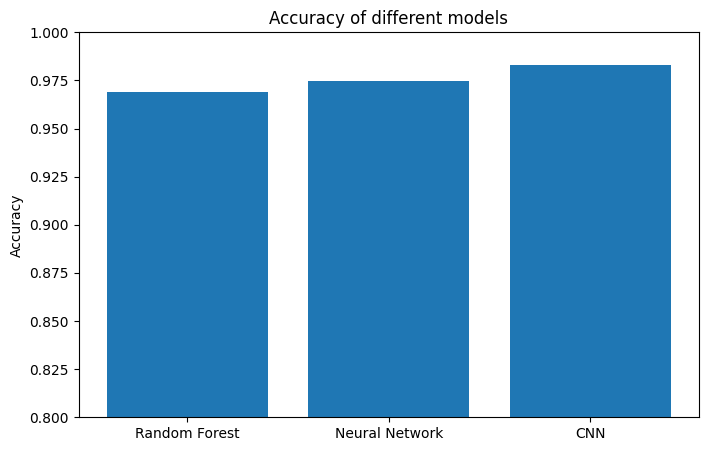

In [11]:
models = ['Random Forest', 'Neural Network', 'CNN']
accuracies = [rf_accuracy, nn_accuracy, cnn_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies)
plt.ylim(0.8, 1.0) 
plt.ylabel('Accuracy')
plt.title('Accuracy of different models')
plt.show()

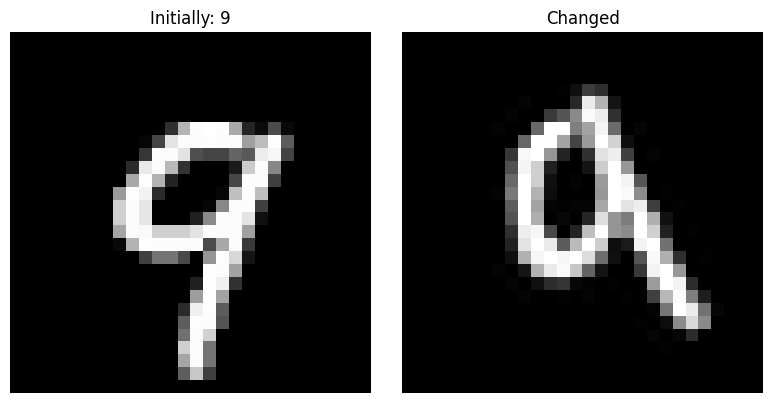


Predictions for changed image:
Random Forest prediction: 9
Neural Network prediction: 9
CNN prediction: 4


In [12]:
example_idx = 12
example_image = X_test[example_idx]
example_label = y_test[example_idx]

rotated_image = rotate(example_image, 45, reshape=False)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(example_image, cmap='gray')
plt.title(f"Initially: {example_label}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rotated_image, cmap='gray')
plt.title("Changed")
plt.axis('off')
plt.tight_layout()
plt.show()

rotated_image_reshaped = rotated_image.reshape(1, 28, 28)
print("\nPredictions for changed image:")

rf_pred = rf_model.classifier.predict_model(rotated_image_reshaped)[0]
nn_pred = nn_model.classifier.predict_model(rotated_image_reshaped)[0]
cnn_pred = cnn_model.classifier.predict_model(rotated_image_reshaped)[0]

print(f"Random Forest prediction: {rf_pred}")
print(f"Neural Network prediction: {nn_pred}")
print(f"CNN prediction: {cnn_pred}")